In [1]:
import numpy as np
import pandas as pd
#最大表示行数の指定（ここでは50行を指定）
pd.set_option('display.max_rows', 50)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
def plot_confusion_matrix(test_y,pred_y,class_names,normalize=False, fontsize=32):
    cm = confusion_matrix(test_y,pred_y)
    # classes = class_names[unique_labels(test_y,pred_y)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=0)
    
    if len(class_names) <= 3:
        fig, ax = plt.subplots(figsize=(8, 4))
    else:
        fig, ax = plt.subplots(figsize=(16, 8))

    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=class_names,
           yticklabels=class_names,
           ylabel='True label\n',
           xlabel='\nPredicted label')
    fmt = '.2f' if normalize else 'd'
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j,
                    i,
                    format(cm[i, j], fmt),
                    ha="center",
                    va="center",
                    color="red", fontsize=fontsize)
    fig.tight_layout()
    return ax

In [3]:
def rename(kind, hold_position, name):
    if kind == "test":
        file_path = "pattern2Hips/" + kind + "_" + name + "分類_pattern2.npy"
        return file_path
    
    if name == "a安部":
        file_path = "pattern2Hips/" + name + "分類_" + kind + "_" + hold_position + "_pattern2.npy"
#     elif name == "熊野" and kind == "validation":
#         file_path = "pattern" + pattern + "/val_" + hold_position + "_" + name + "分類.npy"
    else:
        file_path = "pattern2Hips/" + kind + "_" + hold_position + "_" + name + "分類_pattern2.npy"
    return file_path

In [4]:
def pattern2Concat(kind, hold_position, name):
    if kind == "train":
        label = np.load("../../Data/センサ別npyファイル/train/train_Bag/train_Bag_Label.npy")[:, 0].reshape([-1, 1])
        label = np.delete(label, 120845, 0)
        pattern_file = np.array([1] * label.shape[0]).reshape([-1, 1])
    else:
        label = np.load("../../Data/センサ別npyファイル/validation/validation_Bag/validation_Bag_Label.npy")[:, 0].reshape([-1, 1])
        pattern_file = np.load("validation_pattern2.npy")
        print("pattern2.npyのshape", pattern_file.shape)
    
    file_path = rename(kind, hold_position, name)
    
    print(name, np.load(file_path).shape)
    print(np.argmax(np.load(file_path), axis=1), np.argmax(np.load(file_path), axis=1).reshape([-1, 1]).shape)
    predict = np.argmax(np.load(file_path), axis=1).reshape([-1, 1])
    
    if kind == "train" and name == "安部":
        predict = np.delete(predict, 120845, 0)
    
#     if name != "熊野":
    predict += 1

    
    print(pattern_file.shape, label.shape, predict.shape, np.unique(predict))
    result = np.concatenate([pattern_file.reshape([-1, 1]), label, predict], axis=1).astype(np.int32)
    result = pd.DataFrame(result, columns=["pattern", "label", name + "predict"])
    return result

# すべての保持位置の評価データに対する結果を出す

In [5]:
# hold_positions = ["Bag", "Hips", "Torso", "Hand"]
hold_positions = ["Hips"]
# names = ["安部", "関口", "熊野", "横山"]
# names = ["安部", "関口", "熊野"]
names = ["安部", "関口"]
patterns = []

for name in names:
    tmp = pattern2Concat("validation", hold_positions[0], name)
    for hold_position in hold_positions[1:]:
        tmp = pd.concat([tmp, pattern2Concat("validation", hold_position, name)], axis=0)
    print(name, tmp.shape)
    patterns.append(tmp)
    
patterns[0].shape

pattern2.npyのshape (28685,)
安部 (28685, 8)
[0 3 2 ... 1 1 6] (28685, 1)
(28685,) (28685, 1) (28685, 1) [1 2 3 4 5 6 7 8]
安部 (28685, 3)
pattern2.npyのshape (28685,)
関口 (28685, 8)
[3 1 2 ... 1 3 6] (28685, 1)
(28685,) (28685, 1) (28685, 1) [1 2 3 4 5 6 7 8]
関口 (28685, 3)


(28685, 3)

安部 0.5671424692431637
関口 0.5900792199067473


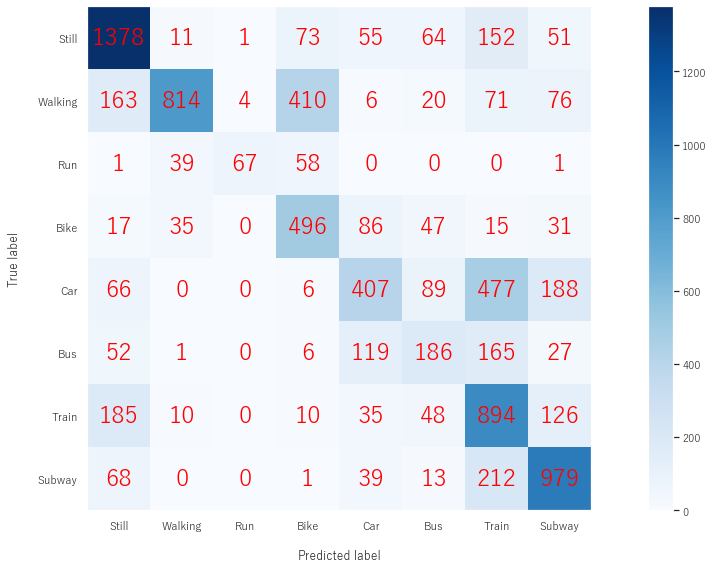

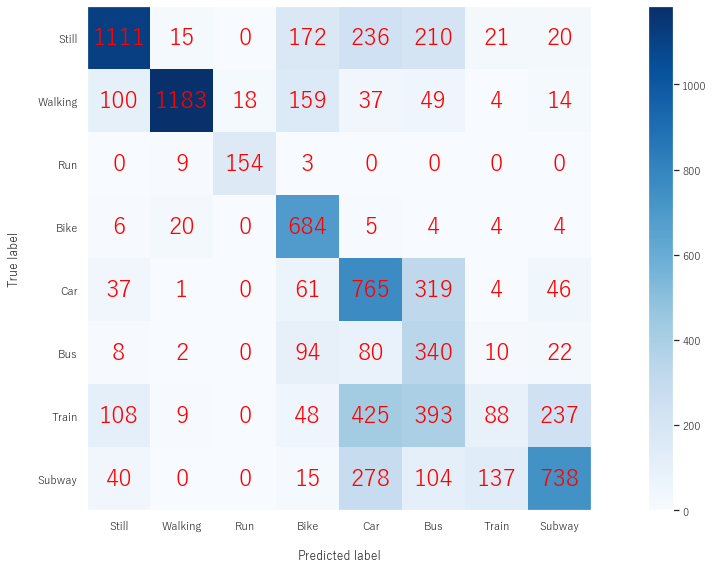

In [6]:
class_names = ["Still", "Walking", "Run", "Bike", "Car", "Bus", "Train", "Subway"]

for pattern, name in zip(patterns, names):
    plot_confusion_matrix(pattern[pattern['pattern'] == 2]['label'], pattern[pattern['pattern'] == 2][name + "predict"], class_names, normalize=False, fontsize=24)
    plt.grid(False)

    f1 = f1_score(pattern[pattern['pattern'] == 2]['label'], pattern[pattern['pattern'] == 2][name + "predict"], average="macro")
    print(name, f1)

# 保持位置ごと成績をチェック

In [7]:
# names = ["安部", "関口", "横山", "熊野"]
# names = ["安部", "関口", "熊野"]
names = ["安部", "関口"]
patterns = []

for name in names:
    patterns.append(pattern2Concat("validation", "Hips", name))


pattern2.npyのshape (28685,)
安部 (28685, 8)
[0 3 2 ... 1 1 6] (28685, 1)
(28685,) (28685, 1) (28685, 1) [1 2 3 4 5 6 7 8]
pattern2.npyのshape (28685,)
関口 (28685, 8)
[3 1 2 ... 1 3 6] (28685, 1)
(28685,) (28685, 1) (28685, 1) [1 2 3 4 5 6 7 8]


安部 0.5671424692431637
関口 0.5900792199067473


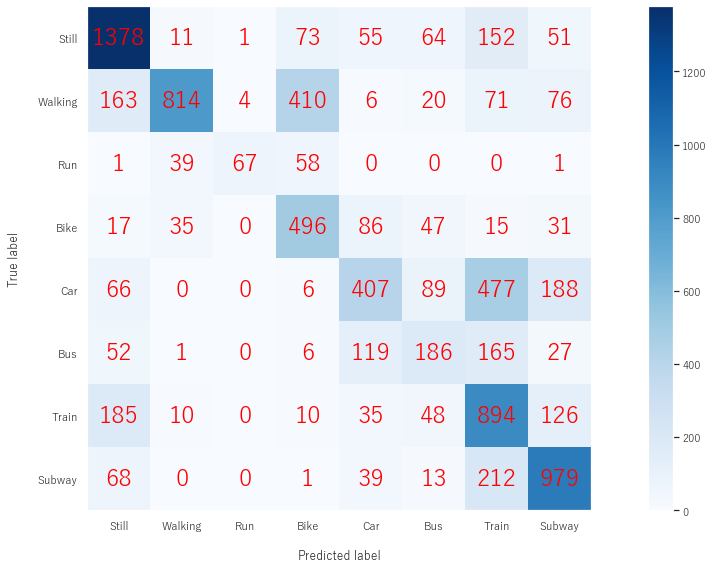

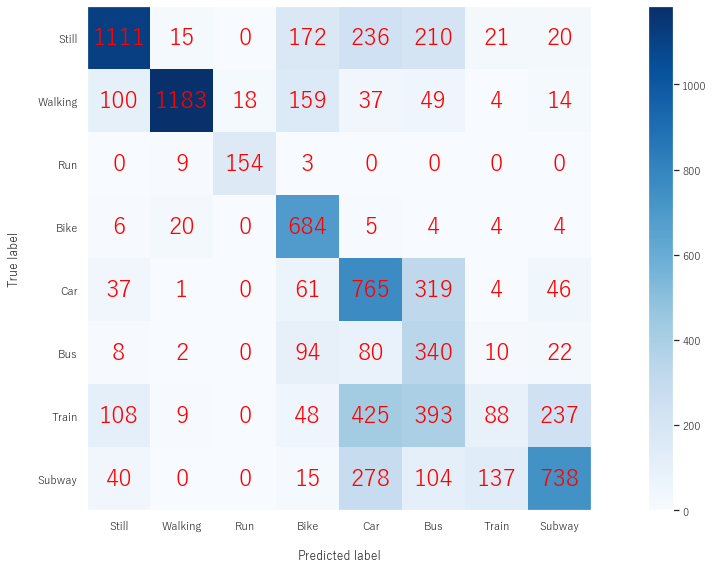

In [8]:
class_names = ["Still", "Walking", "Run", "Bike", "Car", "Bus", "Train", "Subway"]

for pattern, name in zip(patterns, names):
    plot_confusion_matrix(pattern[pattern['pattern'] == 2]['label'], pattern[pattern['pattern'] == 2][name + "predict"], class_names, normalize=False, fontsize=24)
    plt.grid(False)

    f1 = f1_score(pattern[pattern['pattern'] == 2]['label'], pattern[pattern['pattern'] == 2][name + "predict"], average="macro")
    print(name, f1)

# かんたんにロジスティック回帰で分類

In [9]:
from sklearn.linear_model import LogisticRegression

# パターン2の学習して良いデータの読み込み
## pattern == 1のやつってこと

In [10]:
def logisticX_pattern2(kind, names):
    x = []
#     hold_positions = ["Bag", "Hips", "Torso", "Hand"]
    hold_positions = ["Hips"]
    pattern_file = np.load("validation_pattern2.npy").reshape([-1])
        
    for hold_position in hold_positions:
        file_path = rename(kind, hold_position, names[0])
        xx = np.load(file_path).reshape([-1, 8])
        if (names[0] == "安部" or names[0] == "横山") and kind == "train":
            xx = np.delete(xx, 120845, 0)
        if kind == "validation":
            xx = xx[pattern_file == 1]
        for name in names[1:]:
            file_path = rename(kind, hold_position, name)
            tmp = np.load(file_path).reshape([-1, 8])
            if (name == "安部" or name == "横山") and kind == "train":
                tmp = np.delete(tmp, 120845, 0)
            if kind == "validation":
                tmp = tmp[pattern_file == 1]
            xx = np.concatenate([xx, tmp], axis=1)
            print(xx.shape)
        x.append(xx)
            
    x = np.array(x)
    x = x.reshape([-1, 8])
    return x

In [11]:
pattern_file = np.load("validation_pattern2.npy").reshape([-1])

x_train = logisticX_pattern2("train", names)
x_train = np.concatenate([x_train, logisticX_pattern2("validation", names)], axis=0)

y_train_tmp = np.delete(np.load("../../Data/センサ別npyファイル/train/train_Bag/train_Bag_Label.npy")[:, 0].reshape([-1, 1]), 120845, 0)
y_train = np.concatenate([y_train_tmp], axis=0)
y_train_tmp = np.load("../../Data/センサ別npyファイル/validation/validation_Bag/validation_Bag_Label.npy")[:, 0].reshape([-1, 1])
y_train_tmp = y_train_tmp[pattern_file == 1]
y_train = np.concatenate([y_train, y_train_tmp], axis=0)
y_train = y_train.reshape([-1, 1])

x_train = x_train.reshape([-1, 8 * len(names)])
x_train.shape, y_train.shape

(195490, 16)
(14338, 16)


((209828, 16), (209828, 1))

In [12]:
lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
lr.fit(x_train, y_train) # ロジスティック回帰モデルの重みを学習


C:\Users\Owner\Anaconda3\envs\GPU\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Owner\Anaconda3\envs\GPU\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
def logisticTest_pattern2(kind, names):
    x = []
#     hold_positions = ["Bag", "Hips", "Torso", "Hand"]
    hold_positions = ["Hips"]
    pattern_file = np.load("validation_pattern2.npy").reshape([-1])
        
    for hold_position in hold_positions:
        file_path = rename(kind, hold_position, names[0])
        xx = np.load(file_path).reshape([-1, 8])
        if (names[0] == "安部" or names[0] == "横山") and kind == "train":
            xx = np.delete(xx, 120845, 0)
        if kind == "validation":
            xx = xx[pattern_file == 2]
        for name in names[1:]:
            file_path = rename(kind, hold_position, name)
            tmp = np.load(file_path).reshape([-1, 8])
            if (name == "安部" or name == "横山") and kind == "train":
                tmp = np.delete(tmp, 120845, 0)
            if kind == "validation":
                tmp = tmp[pattern_file == 2]
            xx = np.concatenate([xx, tmp], axis=1)
            print(xx.shape)
        x.append(xx)
            
    x = np.array(x)
    x = x.reshape([-1, 8])
    return x

In [50]:
x_test = logisticTest_pattern2("validation", names)
y_test_tmp = np.load("../../Data/センサ別npyファイル/validation/validation_Bag/validation_Bag_Label.npy")[:, 0].reshape([-1, 1])
y_test_tmp = y_test_tmp[pattern_file == 2]
y_test = np.concatenate([y_test_tmp], axis=0)
y_test = y_test.reshape([-1, 1])
x_test = x_test.reshape([-1, 8 * len(names)])

x_test.shape, y_test.shape

(8651, 16)


((8651, 16), (8651, 1))

In [51]:
predict = lr.predict_proba(x_test)
print(predict)

[[7.67582346e-12 2.53251693e-11 1.00000000e+00 ... 2.12378935e-12
  1.52285389e-12 1.03672080e-12]
 [2.61637917e-05 1.62645956e-03 9.98323059e-01 ... 7.61816567e-06
  4.21076337e-06 1.73486120e-06]
 [8.47018259e-12 7.99453676e-11 1.00000000e+00 ... 2.41904039e-12
  1.51374015e-12 9.84140458e-13]
 ...
 [3.18747484e-03 9.94911937e-01 1.19031842e-04 ... 6.44253309e-04
  4.38832981e-04 1.43115328e-04]
 [1.71251672e-03 9.97130710e-01 1.01123253e-04 ... 4.10876120e-04
  2.37770066e-04 6.47919754e-05]
 [3.85980686e-02 1.17770608e-02 1.15699829e-04 ... 2.13773292e-02
  6.05441804e-01 2.80520726e-01]]


In [52]:
def plot_confusion_matrix(test_y,pred_y,class_names,normalize=False, fontsize=32):
    cm = (confusion_matrix(test_y,pred_y))
    # classes = class_names[unique_labels(test_y,pred_y)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=0)
    
    if len(class_names) <= 3:
        fig, ax = plt.subplots(figsize=(8, 4))
    else:
        fig, ax = plt.subplots(figsize=(16, 8))

    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=class_names,
           yticklabels=class_names,
           ylabel='True label\n',
           xlabel='\nPredicted label')
    fmt = '.2f' if normalize else 'd'
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j,
                    i,
                    format(cm[i, j], fmt),
                    ha="center",
                    va="center",
                    color="red", fontsize=fontsize)
    fig.tight_layout()
    return ax

In [53]:
np.where(predict >= 0.75)[0].shape, predict.shape

((5119,), (8651, 8))

In [60]:
np.unique(np.argmax(predict[np.where(predict >= 0.75)[0]], axis=1)) + 1

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [62]:
np.unique(y_test[np.where(predict >= 0.75)[0]])

array([1., 2., 3., 4., 5., 6., 7., 8.])

(8651, 8)
(5119,)
アンサンブル結果 0.6952705200966115


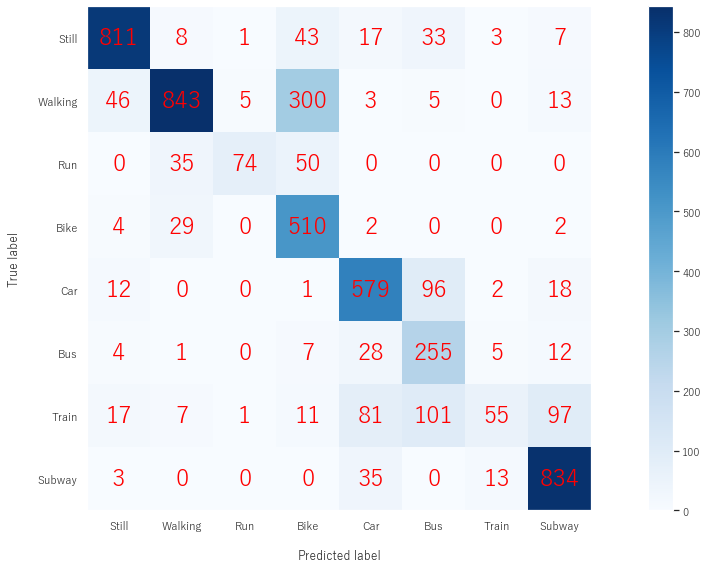

In [65]:
plot_confusion_matrix(y_test[np.where(predict >= 0.75)[0]], np.argmax(predict[np.where(predict >= 0.75)[0]], axis=1) + 1, class_names, normalize=False, fontsize=24)
plt.grid(False)

f1 = f1_score(y_test[np.where(predict >= 0.75)[0]], np.argmax(predict[np.where(predict >= 0.75)[0]], axis=1) + 1, average="macro")
print(predict.shape)
print(np.where(predict >= 0.75)[0].shape)
print("アンサンブル結果", f1)

Hips_アンサンブル結果 0.6098199119849004


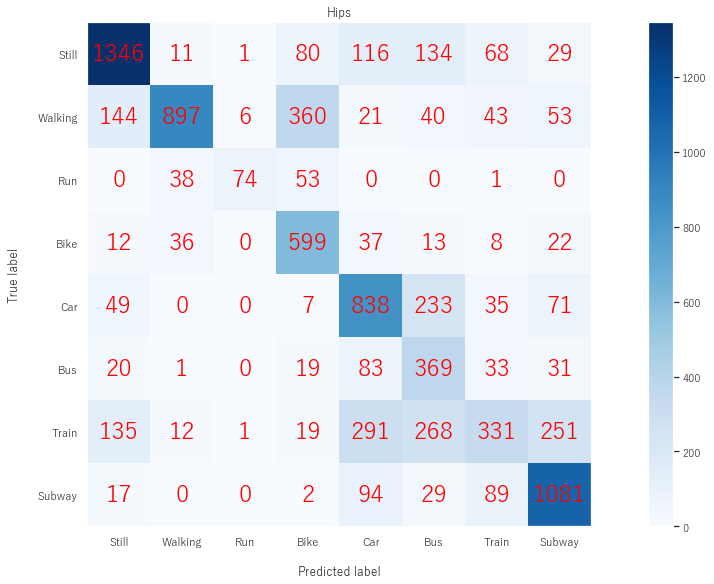

In [18]:
# hold_positions = ["Bag", "Hips", "Torso", "Hand"]
hold_positions = ["Hips"]
for i in range(len(hold_positions)):
    plot_confusion_matrix(y_test[y_test.shape[0]//len(hold_positions)*i:y_test.shape[0]//len(hold_positions)*(i+1)], predict[y_test.shape[0]//len(hold_positions)*i:y_test.shape[0]//len(hold_positions)*(i+1)], class_names, normalize=False, fontsize=24)
    plt.title(hold_positions[i])
    plt.grid(False)

    f1 = f1_score(y_test[y_test.shape[0]//len(hold_positions)*i:y_test.shape[0]//len(hold_positions)*(i+1)], predict[y_test.shape[0]//len(hold_positions)*i:y_test.shape[0]//len(hold_positions)*(i+1)], average="macro")
    print(hold_positions[i] + "_アンサンブル結果", f1)

In [25]:
def logisticTest_pattern2(kind, names):
    file_path = rename(kind, "", names[0])
    x = np.load(file_path)
    print(x.shape)
    for name in names[1:]:
        file_path = rename(kind, "", name)
        x = np.concatenate([x, np.load(file_path)], axis=1)
        print(x.shape)
    return x

In [26]:
x_test = logisticTest_pattern2("test", names)
x_test = x_test.reshape([-1, 8 * len(names)])

x_test.shape

(57573, 8)
(57573, 16)


(57573, 16)

In [30]:
predict = lr.predict(x_test)
print(predict, np.unique(predict))

[4. 6. 4. ... 4. 4. 8.] [1. 2. 3. 4. 5. 6. 7. 8.]


(8.5, 0.5)

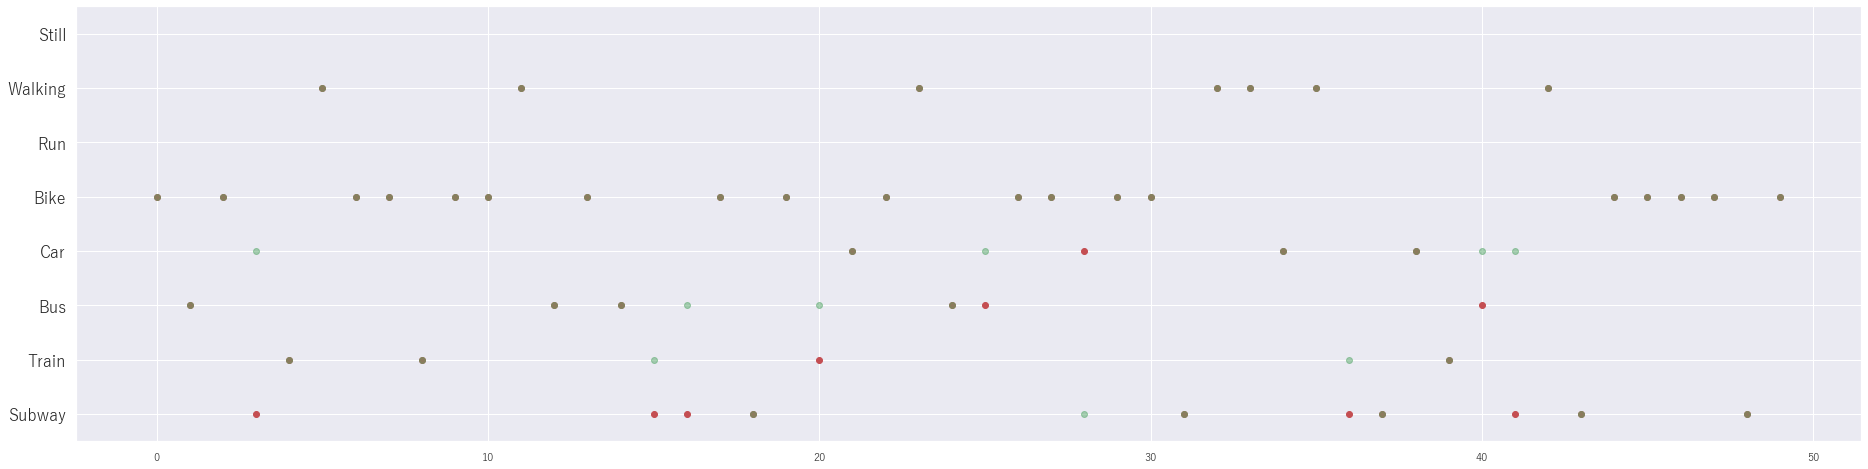

In [34]:
plt.figure(figsize=(32, 8))
plt.plot(predict[:50], 'r', marker='o', linestyle='None')
plt.plot(np.argmax(x_test[:50, :8], axis=1) + 1, 'g', marker='o', linestyle='None', alpha=0.5)
plt.yticks(np.arange(1, 9), ['Still', "Walking", "Run", "Bike", "Car", "Bus", "Train", "Subway"], fontsize=16)
plt.ylim(8.5, 0.5)

In [32]:
labels = []
for i in range(8):
    labels.append(np.sum(predict == (i+1)))

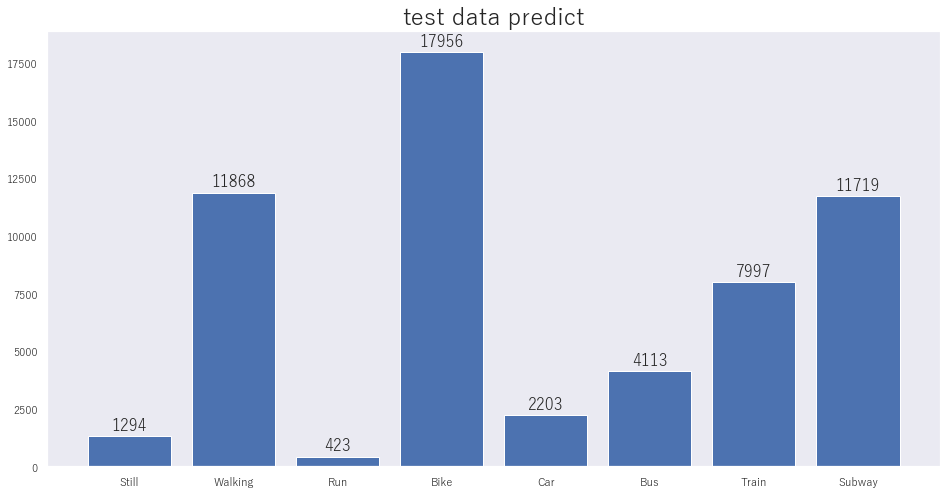

In [33]:
class_names = ["Still", "Walking", "Run", "Bike", "Car", "Bus", "Train", "Subway"]

fig, ax = plt.subplots(figsize=(16, 8))
rect = plt.bar(class_names, np.array(labels))
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                   xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0, 3),
                   textcoords="offset points",
                   ha='center', va='bottom', fontsize=16)
autolabel(rect)
plt.grid(False)
plt.title("test data predict", fontsize=24)
plt.show()

## まずは、3人の出力確率をDeep Learningで学習

In [ ]:
import numpy as np
import os
import random
import scipy
from scipy import signal
from numpy.fft import fft
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.initializers import he_normal
from tensorflow.python.keras.utils.vis_utils import plot_model

from sklearn.model_selection import train_test_split

import pandas as pd
import pickle

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [ ]:
pattern_file = np.load("validation_pattern2.npy").reshape([-1])
names = ["安部", "熊野", "横山"]

x_train = logisticX_pattern2("train", names)
x_train = np.concatenate([x_train, logisticX_pattern2("validation", names)], axis=0)

y_train_tmp = np.delete(np.load("../../Data/センサ別npyファイル/train/train_Bag/train_Bag_Label.npy")[:, 0].reshape([-1, 1]), 120845, 0)
y_train = np.concatenate([y_train_tmp], axis=0)
y_train_tmp = np.load("../../Data/センサ別npyファイル/validation/validation_Bag/validation_Bag_Label.npy")[:, 0].reshape([-1, 1])
y_train_tmp = y_train_tmp[pattern_file == 1]
y_train = np.concatenate([y_train, y_train_tmp], axis=0)
y_train = y_train.reshape([-1, 1])

x_train = x_train.reshape([-1, 8 * len(names)])
x_train.shape, y_train.shape

In [ ]:
x_train = (x_train - x_train.mean(axis=0, keepdims=True)) / x_train.std(axis=0, keepdims=True)
x_train.mean(), x_train.std()

In [ ]:
x_train = np.round(x_train, 5)
x_train.shape

In [ ]:
y_train -= 1
np.unique(y_train)

In [ ]:
lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
lr.fit(x_train, y_train) # ロジスティック回帰モデルの重みを学習


In [ ]:
names = ["安部", "熊野", "横山"]
x_test = logisticTest_pattern2("validation", names)
y_test_tmp = np.load("../../Data/センサ別npyファイル/validation/validation_Bag/validation_Bag_Label.npy")[:, 0].reshape([-1, 1])
y_test_tmp = y_test_tmp[pattern_file == 2]
y_test = np.concatenate([y_test_tmp], axis=0)
y_test = y_test.reshape([-1, 1])
x_test = x_test.reshape([-1, 8 * len(names)])

x_test.shape, y_test.shape

In [ ]:
train_predict = model.predict_proba(x_train)
predict = model.predict_proba(x_test)

train_predict.shape, predict.shape

In [ ]:
class_names = ["Still", "Walking", "Run", "Bike", "Car", "Bus", "Train", "Subway"]
plot_confusion_matrix(y_test-1, np.argmax(predict, axis=1), class_names, normalize=False, fontsize=24)
plt.grid(False)

f1 = f1_score(y_test-1, np.argmax(predict, axis=1), average="macro")
print(predict.shape)
print("アンサンブル結果", f1)

In [ ]:
pattern_file = np.load("validation_pattern2.npy").reshape([-1])
names = ["関口"]

x_train = logisticX_pattern2("train", names)
x_train = np.concatenate([x_train, logisticX_pattern2("validation", names)], axis=0)

y_train_tmp = np.delete(np.load("../../Data/センサ別npyファイル/train/train_Bag/train_Bag_Label.npy")[:, 0].reshape([-1, 1]), 120845, 0)
y_train = np.concatenate([y_train_tmp], axis=0)
y_train_tmp = np.load("../../Data/センサ別npyファイル/validation/validation_Bag/validation_Bag_Label.npy")[:, 0].reshape([-1, 1])
y_train_tmp = y_train_tmp[pattern_file == 1]
y_train = np.concatenate([y_train, y_train_tmp], axis=0)
y_train = y_train.reshape([-1, 1])

x_train = x_train.reshape([-1, 8 * len(names)])
x_train.shape, y_train.shape

In [ ]:
x_train = np.concatenate([x_train, train_predict], axis=1)
x_train.shape

In [ ]:
lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
lr.fit(x_train, y_train) # ロジスティック回帰モデルの重みを学習


In [ ]:
names = ["関口"]
x_test = logisticTest_pattern2("validation", names)
y_test_tmp = np.load("../../Data/センサ別npyファイル/validation/validation_Bag/validation_Bag_Label.npy")[:, 0].reshape([-1, 1])
y_test_tmp = y_test_tmp[pattern_file == 2]
y_test = np.concatenate([y_test_tmp], axis=0)
y_test = y_test.reshape([-1, 1])
x_test = x_test.reshape([-1, 8 * len(names)])

x_test.shape, y_test.shape

In [ ]:
x_test = np.concatenate([x_test, predict], axis=1)
x_test.shape

In [ ]:
predict = lr.predict(x_test)
print(predict)

In [ ]:
plot_confusion_matrix(y_test, predict, class_names, normalize=False, fontsize=24)
plt.grid(False)

f1 = f1_score(y_test, predict, average="macro")
print(predict.shape)
print("アンサンブル結果", f1)

In [ ]:
# hold_positions = ["Bag", "Hips", "Torso", "Hand"]
hold_positions = ["Hips"]
for i in range(len(hold_positions)):
    plot_confusion_matrix(y_test[y_test.shape[0]//len(hold_positions)*i:y_test.shape[0]//len(hold_positions)*(i+1)], predict[y_test.shape[0]//len(hold_positions)*i:y_test.shape[0]//len(hold_positions)*(i+1)], class_names, normalize=False, fontsize=24)
    plt.title(hold_positions[i])
    plt.grid(False)

    f1 = f1_score(y_test[y_test.shape[0]//len(hold_positions)*i:y_test.shape[0]//len(hold_positions)*(i+1)], predict[y_test.shape[0]//len(hold_positions)*i:y_test.shape[0]//len(hold_positions)*(i+1)], average="macro")
    print(hold_positions[i] + "_アンサンブル結果", f1)